# Project: Wrangling and Analyzing Data
- Import Libraries

In [1]:
import os
import re
import time
import json
import tweepy
import requests
import webbrowser
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from urllib.request import urlretrieve

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
if not os.path.exists('twitter_archive_enhanced.csv'):
    try:
        url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv'
        urlretrieve(url, 'twitter_archive_enhanced.csv')
        print('File saved successfully')
    except OSError as e:
        print(e)

In [3]:
df_archive = pd.read_csv('twitter_archive_enhanced.csv')
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
if not os.path.exists("image_predictions.tsv"):
    try:
        url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
        page = requests.get(url)
        print('Connection sucessful')
        with open('image_predictions.tsv', 'wb') as file:
            file.write(page.content)
            print('File saved successfully')
    except OSError as e:
        print(e)

In [5]:
df_image = pd.read_csv('image_predictions.tsv', sep = '\t')
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

- Extract `tweet_id` from `twitter_archive_enhanced.csv` file and save it line by line


In [6]:
tweet_id = list(df_archive.tweet_id)

file_name = 'tweet_id.txt'
with open(file_name, 'w') as f:
  for id in tweet_id:
    f.write(f'{str(id)}\n')

'''
Test if it can be printed line by line.

 with open(file_name, 'r') as f:
  tweet_id = f.readline()
  print(tweet_id)
'''

"\nTest if it can be printed line by line.\n\n with open(file_name, 'r') as f:\n  tweet_id = f.readline()\n  print(tweet_id)\n"

-   Download tweets with API

In [ ]:
#import tweepy
#from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = "Your Key Here"
consumer_secret = "Your Key Here"
access_token = "Your Key Here"
access_secret = "Your Key Here"
bearer_token = "Your Key Here"

#auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

- Read the `tweet_json.txt` file

In [7]:
tweets = []
for line in open('tweet_json.txt', 'r'):
    tweets.append(json.loads(line))

In [8]:
id = []
favorite_count = []
retweet_count = []
created_at = []
for value in tweets:
  id.append(value['id'])
  favorite_count.append(value['favorite_count'])
  retweet_count.append(value['retweet_count'])
  date = time.strftime('%Y-%m-%d %H:%M:%S', time.strptime(value['created_at'],'%a %b %d %H:%M:%S +0000 %Y'))
  created_at.append(date)


dict = {
    'Created_at' : created_at,
    'tweet_id' : id,
    'favorite_count' : favorite_count,
    'retweet_count' : retweet_count,
    }

df_tweet = pd.DataFrame(dict)

In [9]:
df_tweet.head()

,Created_at,tweet_id,favorite_count,retweet_count
0,2017-08-01 16:23:56,892420643555336193,33810,7009
1,2017-08-01 00:17:27,892177421306343426,29330,5301
2,2017-07-31 00:18:03,891815181378084864,22053,3481
3,2017-07-30 15:58:51,891689557279858688,36940,7225
4,2017-07-29 16:00:24,891327558926688256,35310,7760


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [10]:
df_archive
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [11]:
df_image
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [12]:
df_tweet
df_tweet.head()

,Created_at,tweet_id,favorite_count,retweet_count
0,2017-08-01 16:23:56,892420643555336193,33810,7009
1,2017-08-01 00:17:27,892177421306343426,29330,5301
2,2017-07-31 00:18:03,891815181378084864,22053,3481
3,2017-07-30 15:58:51,891689557279858688,36940,7225
4,2017-07-29 16:00:24,891327558926688256,35310,7760


In [13]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [14]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Created_at      2327 non-null   object
 1   tweet_id        2327 non-null   int64 
 2   favorite_count  2327 non-null   int64 
 3   retweet_count   2327 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 72.8+ KB


In [16]:
all_columns = pd.Series(list(df_archive) + list(df_image) + list(df_tweet))
all_columns[all_columns.duplicated()]

17    tweet_id
30    tweet_id
dtype: object

In [17]:
df_archive.isnull().sum().sum()

11140

In [18]:
df_image.isnull().sum().sum()

0

In [19]:
df_tweet.isnull().sum().sum()

0

In [20]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [21]:
df_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [22]:
df_tweet.describe()

,tweet_id,favorite_count,retweet_count
count,2.327000e+03,2327.000000,2327.000000
mean,7.417930e+17,7054.808767,2471.230769
std,6.820795e+16,10963.276515,4185.223445
min,6.660209e+17,0.000000,1.000000
25%,6.781394e+17,1225.500000,494.500000
50%,7.178418e+17,3050.000000,1149.000000
75%,7.986547e+17,8606.000000,2860.500000
max,8.924206e+17,144897.000000,70742.000000


In [23]:
df_archive['in_reply_to_status_id'].unique()

array([           nan, 8.86266357e+17, 8.81607037e+17, 8.79553827e+17,
       8.70726203e+17, 8.63425646e+17, 6.67152164e+17, 8.57156678e+17,
       8.55818117e+17, 8.56286004e+17, 8.55861584e+17, 8.55858536e+17,
       8.50328819e+17, 8.48212112e+17, 8.47606176e+17, 7.59099524e+17,
       8.40698300e+17, 8.38145499e+17, 8.38085539e+17, 8.35245984e+17,
       8.32087548e+17, 8.31903044e+17, 8.26598365e+17, 8.23326389e+17,
       8.21152593e+17, 8.13127252e+17, 8.11627233e+17, 7.33109485e+17,
       8.01854331e+17, 8.00857954e+17, 7.97123751e+17, 7.72743019e+17,
       7.66711819e+17, 7.63865175e+17, 7.50180499e+17, 7.47648654e+17,
       7.46885919e+17, 6.91416866e+17, 7.38411920e+17, 7.29113531e+17,
       7.07980066e+17, 7.03255936e+17, 7.04485745e+17, 7.03041950e+17,
       6.96488711e+17, 6.75349384e+17, 6.70668383e+17, 6.93642232e+17,
       6.93572216e+17, 6.92417313e+17, 6.92041935e+17, 6.90341254e+17,
       6.86034025e+17, 6.85547936e+17, 6.84959799e+17, 6.84481075e+17,
      

In [24]:
df_archive['in_reply_to_user_id'].unique()

array([           nan, 2.28118160e+09, 4.73844300e+07, 3.10544075e+09,
       1.64877600e+07, 7.75962000e+07, 4.19698384e+09, 1.80670967e+08,
       2.79280991e+08, 1.94351775e+08, 1.36157220e+07, 2.19550580e+07,
       8.40547864e+17, 2.89413118e+09, 2.62595760e+07, 3.05820820e+07,
       2.06837240e+07, 1.58285381e+09, 1.13211856e+08, 1.18563420e+07,
       2.91859009e+08, 2.91663050e+07, 7.30505014e+17, 1.58464070e+07,
       4.71729748e+09, 3.58972768e+08, 2.31910820e+09, 2.87854860e+07,
       1.19898851e+09, 4.67036706e+08, 1.63746780e+07, 2.14356580e+07])

In [25]:
df_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1496,692530551048294401,NaN,NaN,2016-01-28 02:12:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Cody. He's been to like 80 countr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/692530551...,10,10,Cody,None,None,None,None
1623,684902183876321280,NaN,NaN,2016-01-07 00:59:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Perry. He's an Augustus Gloopster. Ver...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684902183...,11,10,Perry,None,None,None,None
2167,669359674819481600,NaN,NaN,2015-11-25 03:39:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Saydee. She's a Rochester Ecclesiastical...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669359674...,11,10,Saydee,None,None,None,None
504,813051746834595840,NaN,NaN,2016-12-25 16:00:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bauer. He had nothing to do with the c...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813051746...,13,10,Bauer,None,None,None,None
309,835536468978302976,NaN,NaN,2017-02-25 17:06:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Lola. Her hobbies include ...,8.352641e+17,4.196984e+09,2017-02-24 23:04:14 +0000,https://www.gofundme.com/lolas-life-saving-sur...,12,10,Lola,None,None,None,None


In [26]:
df_archive.tweet_id.duplicated().sum()

0

In [27]:
df_archive.doggo.duplicated().sum()

2354

In [28]:
df_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [29]:
df_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [30]:
df_archive.source[0]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [31]:
df_image.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1555,793195938047070209,https://pbs.twimg.com/media/CwH_foYWgAEvTyI.jpg,2,Labrador_retriever,0.654762,True,golden_retriever,0.074100,True,Chihuahua,0.042339,True
1711,818536468981415936,https://pbs.twimg.com/media/C1wGkYoVQAAuC_O.jpg,1,swing,0.999403,False,Welsh_springer_spaniel,0.000062,True,bow,0.000030,False
1510,786036967502913536,https://pbs.twimg.com/media/CtKHLuCWYAA2TTs.jpg,1,golden_retriever,0.993830,True,cocker_spaniel,0.003143,True,Great_Pyrenees,0.000917,True
324,671879137494245376,https://pbs.twimg.com/media/CVL-goTWoAEUfhy.jpg,1,bee_eater,0.302648,False,toucan,0.219646,False,chickadee,0.156687,False
842,695051054296211456,https://pbs.twimg.com/media/CaVRP4GWwAERC0v.jpg,1,Boston_bull,0.761454,True,pug,0.075395,True,Chihuahua,0.041598,True


In [32]:
df_image.p1_dog.unique()

array([ True, False])

In [33]:
df_image.p2_dog.unique()

array([ True, False])

In [34]:
df_image.p3_dog.unique()

array([ True, False])

In [35]:
df_tweet.sample(5)

,Created_at,tweet_id,favorite_count,retweet_count
2031,2015-11-30 04:22:44,671182547775299584,980,284
374,2017-01-30 17:10:04,826115272272650244,14743,2875
2134,2015-11-25 04:43:02,669375718304980992,1179,633
117,2017-05-29 16:24:37,869227993411051520,18139,3201
2309,2015-11-16 04:02:55,666104133288665088,12901,5489


## Data Quality Issues

#### Quality
##### `archive` table
- Change the datatype for some of the columns e.g timestamp
- A lot of missing data in the features
- Missing values represented as `None`
- Expanded_url cintaining more than one url

##### `image` table
- Lowercase for P1, P2, and P3 sometimes
- Text column not properly formatted

##### `tweet` table
- Extract the date from Created_at column
- Rename the Created_at column as Timestamp to bridge uniformity


#### Tidiness
- P1, P2, and P3 should be formatted properly in the `image` table
- Remove html tags from the source column in the `archive` table
- Tweet_id in `archive` table duplicated in `image` and `tweet` tables

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [36]:
# Make copies of original pieces of data
archive = df_archive.copy()
image = df_image.copy()
tweet = df_tweet.copy()

### Issue #1: Missing Data

Define:
`archive`: `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp` contain little or no meaningful data and should be dropped

In [37]:
archive.drop(columns = ['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp'], inplace = True)

In [38]:
archive.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Issue #2: Data type

`archive`: Timestamp is a datetime and not object <br>
`archive`: Tweet_id is an object not an integer <br>
`image`: P2_dog is a boolean and not integer <br>
`tweet`: Created_at is a datetime and not integer <br>


#### Define: 

Change the timestamp data type to datetime, p2_dog to boolean, and tweet_id to object

#### Code

In [39]:
archive['timestamp'] = pd.to_datetime(archive['timestamp'])
archive['tweet_id'] = archive['tweet_id'].astype(str)
image['tweet_id'] = image['tweet_id'].astype(str)
image['p2_dog'] =  image['p2_dog'].astype(bool)
tweet['Created_at'] = pd.to_datetime(tweet['Created_at'])
tweet['tweet_id'] = tweet['tweet_id'].astype(str)

#### Test

In [40]:
archive.dtypes

tweet_id                           object
timestamp             datetime64[ns, UTC]
source                             object
text                               object
expanded_urls                      object
rating_numerator                    int64
rating_denominator                  int64
name                               object
doggo                              object
floofer                            object
pupper                             object
puppo                              object
dtype: object

In [41]:
image.dtypes

tweet_id     object
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [42]:
tweet.dtypes

Created_at        datetime64[ns]
tweet_id                  object
favorite_count             int64
retweet_count              int64
dtype: object

### Issue #3: Format Column names

#### Define
- Change the created_at to timestamp in `tweet` table

#### Code

In [43]:
archive.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

In [44]:
image.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [45]:
tweet.rename(columns= {"Created_at": "timestamp"}, inplace = True)

#### Test

In [46]:
tweet.columns

Index(['timestamp', 'tweet_id', 'favorite_count', 'retweet_count'], dtype='object')

### Issue #4: Format `p1, p2, and p3` in the image table

#### Define: 
- Replace `"-"` with space (`" "`) for `p1, p2, and p3` in the image table

#### Code

In [47]:
image.p1 = image.p1.str.replace("_", ",")
image.p2 = image.p2.str.replace("_", ",")
image.p3 = image.p3.str.replace("_", ",")

#### Test

In [48]:
image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,"Welsh,springer,spaniel",0.465074,True,collie,0.156665,True,"Shetland,sheepdog",0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,"miniature,pinscher",0.074192,True,"Rhodesian,ridgeback",0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,"German,shepherd",0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,"Rhodesian,ridgeback",0.408143,True,redbone,0.360687,True,"miniature,pinscher",0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,"miniature,pinscher",0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Issue #5: Format the timestamp and source in archive

## Define
- Remove html tags from the source column in the `archive` table
- Make the timestamp to contain year, month and day only
- Choose only the expanded url url that follows the normal pattern

## Code

In [49]:
archive['source']  = archive.source.str.extract('(http://\w+\.com/\w+/iphone)', expand = True)
archive['expanded_urls']  = archive.expanded_urls.str.extract('(https://\w+\.com/\w+/\w+/\d+/\w+/\d)', expand = True)

archive['timestamp'] = archive['timestamp'].astype(str)
tweet['timestamp'] = tweet['timestamp'].astype(str)
archive['timestamp'] = archive['timestamp'].str.extract('(\d{4}[-]\d{2}[-]\d{2})', expand = True)
tweet['timestamp'] = tweet['timestamp'].str.extract('(\d{4}[-]\d{2}[-]\d{2})', expand = True)
archive['timestamp'] = pd.to_datetime(archive['timestamp'])
tweet['timestamp'] = pd.to_datetime(tweet['timestamp'])

In [50]:
archive.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


## Test

In [51]:
archive.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [52]:
twitter_archive_master = pd.merge(pd.merge(archive, image, on = "tweet_id"), tweet, on = "tweet_id")

In [53]:
twitter_archive_master.head()

,tweet_id,timestamp_x,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,timestamp_y,favorite_count,retweet_count
0,892420643555336193,2017-08-01,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,...,False,bagel,0.085851,False,banana,0.076110,False,2017-08-01,33810,7009
1,892177421306343426,2017-08-01,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,...,True,Pekinese,0.090647,True,papillon,0.068957,True,2017-08-01,29330,5301
2,891815181378084864,2017-07-31,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,...,True,malamute,0.078253,True,kelpie,0.031379,True,2017-07-31,22053,3481
3,891689557279858688,2017-07-30,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,...,False,"Labrador,retriever",0.168086,True,spatula,0.040836,False,2017-07-30,36940,7225
4,891327558926688256,2017-07-29,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,...,True,"English,springer",0.225770,True,"German,short-haired,pointer",0.175219,True,2017-07-29,35310,7760


## It could be observed that both timestamp_x and timestamp_y are the same
-   Drop timestamp_y
-   Remove  `_x` from timestamp_x

In [54]:
twitter_archive_master.drop(columns = ['timestamp_y'], inplace= True)
twitter_archive_master.rename(columns = {'timestamp_x':'timestamp'}, inplace = True)
twitter_archive_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,2017-08-01,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,33810,7009
1,892177421306343426,2017-08-01,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,29330,5301
2,891815181378084864,2017-07-31,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,22053,3481
3,891689557279858688,2017-07-30,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,...,0.170278,False,"Labrador,retriever",0.168086,True,spatula,0.040836,False,36940,7225
4,891327558926688256,2017-07-29,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,...,0.555712,True,"English,springer",0.225770,True,"German,short-haired,pointer",0.175219,True,35310,7760


## Data engineering

In [69]:
twitter_archive_master['month'] = twitter_archive_master.timestamp.dt.month_name()
twitter_archive_master['day'] = twitter_archive_master.timestamp.dt.day_name()

In [70]:
twitter_archive_master.to_csv("twitter_archive_master.csv", index = False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1.  Ten top months with the highest favorite_count

2.  Ten top months with the highest tweet_count

3.  Influence of the day on the favourite_count

4.  Finding the correlatiion between the Favorite and retweet counts

## Write funtion for the visualization

In [71]:
df = twitter_archive_master.copy()

In [72]:
def barhplot(x, y, xlabel, title):
    plt.figure(figsize=  (14, 8))
    plt.barh(x, y, align = 'center')
    plt.gca().invert_yaxis()
    plt.xlabel(xlabel, fontsize = 18)
    plt.title(title, fontsize = 18)
    plt.show();


## Ten top months with the highest favorite_count

In [73]:
top = df.sort_values(by = 'favorite_count', ascending = False)
top_10 = top[['tweet_id', 'source', 'favorite_count', 'month']].head(10)
top_10

,tweet_id,source,favorite_count,month
836,744234799360020481,http://twitter.com/download/iphone,144897,June
319,822872901745569793,http://twitter.com/download/iphone,124127,January
422,807106840509214720,http://twitter.com/download/iphone,111710,December
110,866450705531457537,http://twitter.com/download/iphone,108924,May
871,739238157791694849,http://twitter.com/download/iphone,107253,June
59,879415818425184262,http://twitter.com/download/iphone,92885,June
348,819004803107983360,http://twitter.com/download/iphone,82714,January
138,859196978902773760,http://twitter.com/download/iphone,80607,May
94,870374049280663552,http://twitter.com/download/iphone,73941,June
1485,678399652199309312,http://twitter.com/download/iphone,73528,December


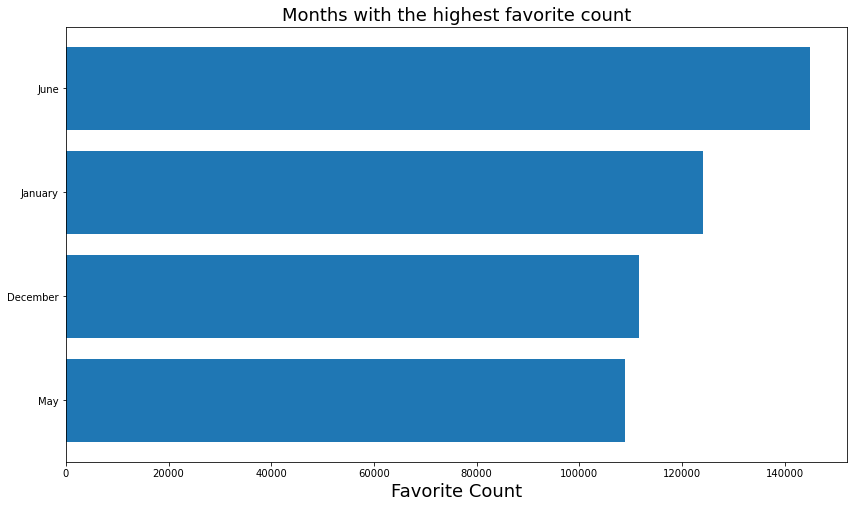

In [74]:
barhplot(top_10.month, top_10.favorite_count, "Favorite Count", "Months with the highest favorite count")

## Ten top months with the highest Retweetcount

In [75]:
top = df.sort_values(by = 'retweet_count', ascending = False)
top_10 = top[['tweet_id', 'source', 'text', 'retweet_count', 'month']].head(10)
top_10.head()

,tweet_id,source,text,retweet_count,month
836,744234799360020481,http://twitter.com/download/iphone,Here's a doggo realizing you can stand in a po...,70742,June
871,739238157791694849,http://twitter.com/download/iphone,Here's a doggo blowing bubbles. It's downright...,52908,June
422,807106840509214720,http://twitter.com/download/iphone,This is Stephan. He just wants to help. 13/10 ...,51687,December
319,822872901745569793,http://twitter.com/download/iphone,Here's a super supportive puppo participating ...,39926,January
59,879415818425184262,http://twitter.com/download/iphone,This is Duddles. He did an attempt. 13/10 some...,37457,June


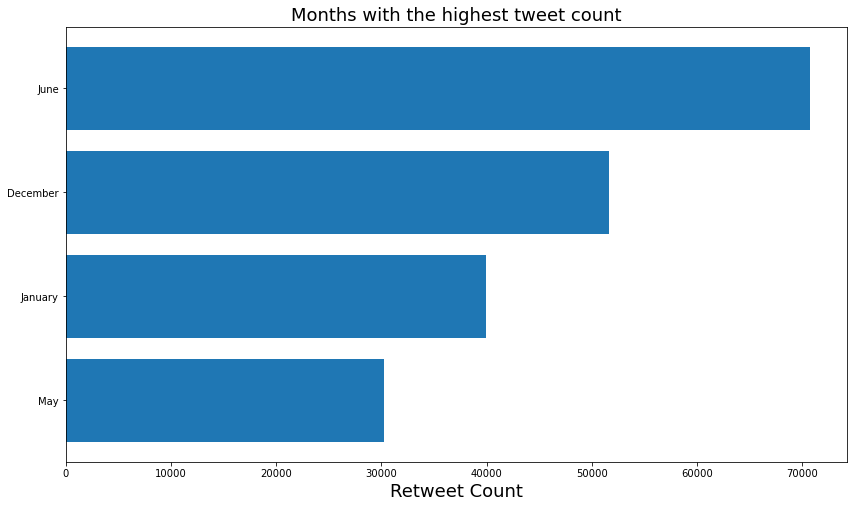

In [76]:
barhplot(top_10.month, top_10.retweet_count, "Retweet Count", "Months with the highest tweet count")

## Influence of the day on the favourite_count

In [77]:
top = df.groupby(by = 'day')
top = df.sort_values(by = 'favorite_count', ascending = False)
top_10 = top[['tweet_id', 'source', 'text', 'favorite_count', 'day']].head(10)
top_10.head()

,tweet_id,source,text,favorite_count,day
836,744234799360020481,http://twitter.com/download/iphone,Here's a doggo realizing you can stand in a po...,144897,Saturday
319,822872901745569793,http://twitter.com/download/iphone,Here's a super supportive puppo participating ...,124127,Saturday
422,807106840509214720,http://twitter.com/download/iphone,This is Stephan. He just wants to help. 13/10 ...,111710,Friday
110,866450705531457537,http://twitter.com/download/iphone,This is Jamesy. He gives a kiss to every other...,108924,Monday
871,739238157791694849,http://twitter.com/download/iphone,Here's a doggo blowing bubbles. It's downright...,107253,Saturday


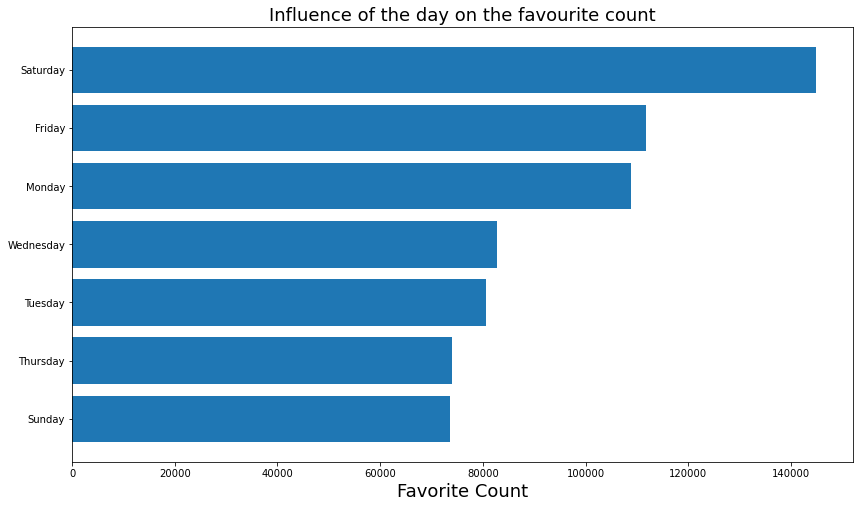

In [78]:
barhplot(top_10.day, top_10.favorite_count, "Favorite Count", "Influence of the day on the favourite count")

## Finding the correlatiion between the Favorite and retweet counts

In [79]:
df.favorite_count.corr(df.retweet_count)

0.8610297825285088

## Visualization

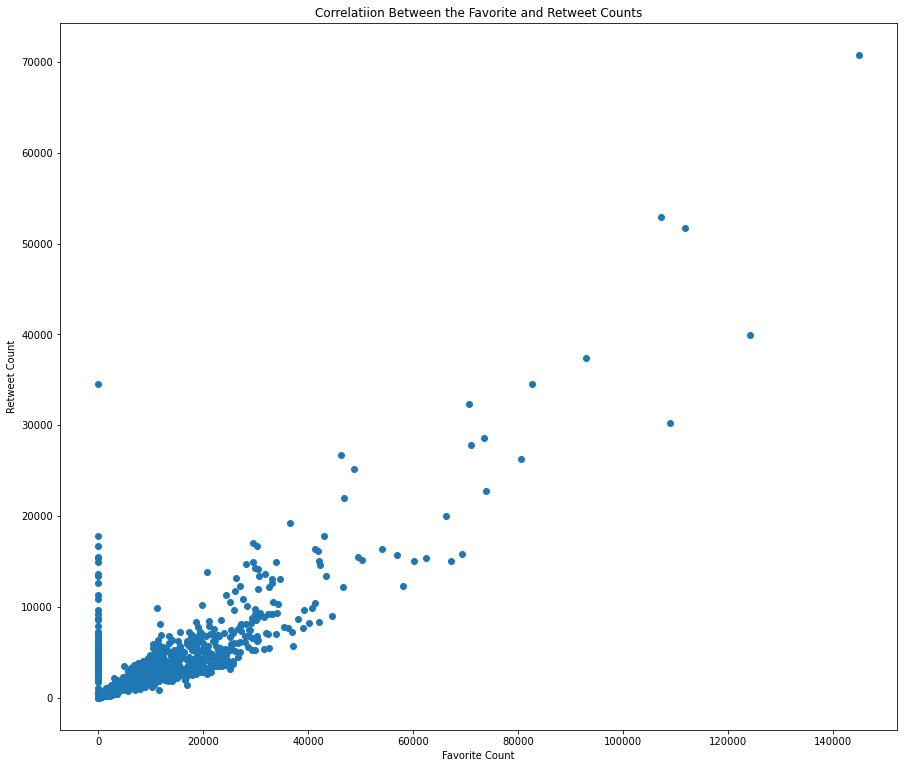

In [80]:
plt.figure(figsize=(15, 13))
ax = plt.axes()
ax.scatter(df.favorite_count, df.retweet_count)

ax.set_xlabel('Favorite Count')
ax.set_ylabel('Retweet Count')
ax.set_title('Correlatiion Between the Favorite and Retweet Counts')

ax.axis('tight')

plt.show()

## Checking for other correlations
- Between favorite count and rating_numerator
- Between favorite count and rating_denominator
- Between retweet count and rating_numerator
- Between retweet count and rating_denominator

In [81]:
df.favorite_count.corr(df.rating_numerator)

0.01605740884435733

In [82]:
df.favorite_count.corr(df.rating_denominator)

-0.025221199482836947

In [83]:
df.retweet_count.corr(df.rating_numerator)

0.0176592027462129

In [84]:
df.retweet_count.corr(df.rating_denominator)

-0.021366610584886505